In [1]:
from IPython.display import display
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model
import statsmodels.formula.api as smf
import string
import re
sns.set_style('white')

In [2]:
df = pd.read_csv("/Users/Jenny/Documents/Thinkful/random downloaded data/crime.csv", skiprows=[0,1,2,3], skipfooter=3)

C:\Users\Jenny\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


In [3]:
df.columns = ['City', 'Population', 'ViolentCrime', 'Murder', 'Rape_rev', 'Rape_leg', 
              'Robbery', 'AggAssault', 'PropertyCrime', 'Burglary', 'Theft', 'MVTheft', 
             'Arson', 'Unnamed']

In [4]:
#Remove commas from numbers, remove spaces before and after entries (if they exist)
for col in df.columns:
    df[col]= df[col].apply(lambda x: str(x).replace(',', ''))
    df[col]= df[col].apply(lambda x: str(x).strip())

#Convert str cols to float so we can do some graphing
numerical_columns = df.columns[1:]
for num_col in numerical_columns:
    df[num_col]= df[num_col].apply(lambda x: float(x))

In [5]:
df.head()

,City,Population,ViolentCrime,Murder,Rape_rev,Rape_leg,Robbery,AggAssault,PropertyCrime,Burglary,Theft,MVTheft,Arson,Unnamed
0,Adams Village,1861.0,0.0,0.0,NaN,0.0,0.0,0.0,12.0,2.0,10.0,0.0,0.0,NaN
1,Addison Town and Village,2577.0,3.0,0.0,NaN,0.0,0.0,3.0,24.0,3.0,20.0,1.0,0.0,NaN
2,Akron Village,2846.0,3.0,0.0,NaN,0.0,0.0,3.0,16.0,1.0,15.0,0.0,0.0,NaN
3,Albany,97956.0,791.0,8.0,NaN,30.0,227.0,526.0,4090.0,705.0,3243.0,142.0,NaN,NaN
4,Albion Village,6388.0,23.0,0.0,NaN,3.0,4.0,16.0,223.0,53.0,165.0,5.0,NaN,NaN


In [6]:
#training dataset

training = pd.DataFrame()

training['property_crime'] = df.PropertyCrime
training['population'] = df.Population
training['population_squared'] = df.Population**2
training['murder'] = df.Murder
training['robbery'] = df.Robbery

training.head()

,property_crime,population,population_squared,murder,robbery
0,12.0,1861.0,3.463321e+06,0.0,0.0
1,24.0,2577.0,6.640929e+06,0.0,0.0
2,16.0,2846.0,8.099716e+06,0.0,0.0
3,4090.0,97956.0,9.595378e+09,8.0,227.0
4,223.0,6388.0,4.080654e+07,0.0,4.0


In [7]:
#instantiate, fit
regr = linear_model.LinearRegression()
Y_train = training['property_crime'].values.reshape(-1, 1)
X_train = training[['population','population_squared', 'murder','robbery']]
model = regr.fit(X_train, Y_train)

# Inspect the results
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X_train, Y_train))


Coefficients: 
 [[  1.59234099e-02  -1.01045767e-09   1.17559526e+02   2.09186042e+00]]

Intercept: 
 [ 24.1435902]

R-squared:
0.998741742243


In [8]:
df2014 = pd.read_csv("/Users/Jenny/Documents/Thinkful/random downloaded data/crime_2014.csv", skiprows=[0,1,2,3], skipfooter=3)

C:\Users\Jenny\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


In [9]:
df2014.head()

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3,Unnamed: 13
0,Adams Village,"1,851",0,0.0,NaN,0.0,0,0,11,1,10,0,0.0,NaN
1,Addison Town and Village,"2,568",2,0.0,NaN,0.0,1,1,49,1,47,1,0.0,NaN
2,Afton Village4,820,0,0.0,0,NaN,0,0,1,0,1,0,0.0,NaN
3,Akron Village,"2,842",1,0.0,NaN,0.0,0,1,17,0,17,0,0.0,NaN
4,Albany4,"98,595",802,8.0,54,NaN,237,503,"3,888",683,"3,083",122,12.0,NaN


In [10]:
df2014.columns = ['City', 'Population', 'ViolentCrime', 'Murder', 'Rape_rev', 'Rape_leg', 
              'Robbery', 'AggAssault', 'PropertyCrime', 'Burglary', 'Theft', 'MVTheft', 
             'Arson', 'Unnamed']

In [11]:
#Remove commas from numbers, remove spaces before and after entries (if they exist)
for col in df2014.columns:
    df2014[col]= df2014[col].apply(lambda x: str(x).replace(',', ''))
    df2014[col]= df2014[col].apply(lambda x: str(x).strip())

#Convert str cols to float so we can do some graphing
numerical_columns = df2014.columns[1:]
for num_col in numerical_columns:
    df2014[num_col]= df2014[num_col].apply(lambda x: float(x))

In [12]:
df2014.head()

,City,Population,ViolentCrime,Murder,Rape_rev,Rape_leg,Robbery,AggAssault,PropertyCrime,Burglary,Theft,MVTheft,Arson,Unnamed
0,Adams Village,1851.0,0.0,0.0,NaN,0.0,0.0,0.0,11.0,1.0,10.0,0.0,0.0,NaN
1,Addison Town and Village,2568.0,2.0,0.0,NaN,0.0,1.0,1.0,49.0,1.0,47.0,1.0,0.0,NaN
2,Afton Village4,820.0,0.0,0.0,0.0,NaN,0.0,0.0,1.0,0.0,1.0,0.0,0.0,NaN
3,Akron Village,2842.0,1.0,0.0,NaN,0.0,0.0,1.0,17.0,0.0,17.0,0.0,0.0,NaN
4,Albany4,98595.0,802.0,8.0,54.0,NaN,237.0,503.0,3888.0,683.0,3083.0,122.0,12.0,NaN


In [13]:
#create testing set from 2014 data
testing = pd.DataFrame()

testing['property_crime'] = df2014.PropertyCrime
testing['population'] = df2014.Population
testing['population_squared'] = df2014.Population**2
testing['murder'] = df2014.Murder
testing['robbery'] = df2014.Robbery

testing.head()
testing = testing.dropna()

In [14]:
testing.isnull().values.any()

False

In [15]:
# Predictions from model
X_test = testing[['population','population_squared', 'murder','robbery']]
Y_test = testing[['property_crime']]

predictions = regr.predict(X_test)
predictions = pd.DataFrame(predictions)

In [16]:
# Check the accuracy of the prediction
model.score(X_test, Y_test)

0.99857254936517659

In [17]:
obs_pred = pd.concat([Y_test, predictions], axis=1)
obs_pred.columns = ['observed', 'predicted']
obs_pred.head()

,observed,predicted
0,11.0,53.614360
1,49.0,67.120104
2,1.0,37.200107
3,17.0,69.389760
4,3888.0,3020.536683


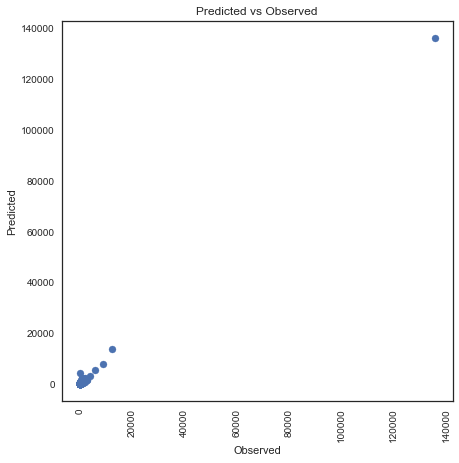

In [19]:
# Plot of the model and prediction
plt.figure(figsize=(7,7))

plt.scatter(obs_pred['observed'], obs_pred['predicted'])
plt.xlabel('Observed')
plt.ylabel('Predicted')
plt.title('Predicted vs Observed')
plt.xticks(rotation=90)
plt.show()


Possible that the accuracy is due to the fact that we're working with the same state, just a different year. Might not be as accurate if we were working with a dataset from another state.